<a href="https://colab.research.google.com/github/lobnaabdelhamed97/Terroist-group-prediction/blob/master/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle Commands**

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lobnaabdelhamed","key":"1c9bcaa0517f9be89a195f8ad7139a97"}'}

In [0]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/ 
#change permission
!chmod 600 ~/.kaggle/kaggle.json

# **2. Download and understand the datasets**

a. Reading the GTD dataset

In [0]:
!kaggle datasets download -d START-UMD/gtd

 31% 9.00M/28.7M [00:01<00:02, 8.14MB/s]
100% 28.7M/28.7M [00:01<00:00, 23.8MB/s]


In [0]:
from zipfile import ZipFile 
file_name = "gtd.zip" 
with ZipFile(file_name,'r') as zip: 
  zip.extractall() 
  print('Done')

Done


In [0]:
import pandas as pd 
gtdDataset = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1') 
print("GTD")
print("----")

print(gtdDataset.shape)
gtdDataset.head()
gtdDataset.head(n=181691)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


GTD
----
(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [0]:
print(gtdDataset.shape)

(181691, 135)


b. Reading the WHR dataset

In [0]:
#downloading
!kaggle datasets download -d unsdsn/world-happiness

  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 33.1MB/s]


In [0]:
#unzipping
from zipfile import ZipFile 
file_name = "world-happiness.zip" 
with ZipFile(file_name,'r') as zip: 
  zip.extractall() 
  print('Done')

Done


In [0]:
whr2015 = pd.read_csv('2015.csv',encoding='latin1') 

whr2016 = pd.read_csv('2016.csv',encoding='latin1') 

whr2017 = pd.read_csv('2017.csv',encoding='latin1') 


In [0]:
print("WHR2015")
print("-------")

print(whr2015.shape)
whr2015.head()
whr2015.head(n=158)

WHR2015
-------
(158, 12)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [0]:
print("WHR2016")
print("-------")
print(whr2016.shape)
whr2016.head()
whr2016.head(n=157)

WHR2016
-------
(157, 13)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [0]:
print("WHR2017")
print("-------")
print(whr2017.shape)
whr2017.head()
whr2017.head(n=155)


WHR2017
-------
(155, 12)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


# **3. Feature Selection**

You are required to choose the features you see suitable for training the classifiers
from the 135 features of the GTD and the 10 Features of the World Happiness
Report.


**GTD:**

In [0]:
gtdDataset2 = gtdDataset[[
                          "gname","eventid", "country", "country_txt", "region","region_txt","iyear", "city",
                          'weaptype1',
                          "attacktype1", "targtype1",  "target1"]]
print("GTD after feauture selection")
print("----------------------------")
print(gtdDataset2.shape)
gtdDataset2.head()
gtdDataset2.head(n=150)


GTD after feauture selection
----------------------------
(181691, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
0,MANO-D,197000000001,58,Dominican Republic,2,Central America & Caribbean,1970,Santo Domingo,13,1,14,Julio Guzman
1,23rd of September Communist League,197000000002,130,Mexico,1,North America,1970,Mexico city,13,6,7,"Nadine Chaval, daughter"
2,Unknown,197001000001,160,Philippines,5,Southeast Asia,1970,Unknown,13,1,10,Employee
3,Unknown,197001000002,78,Greece,8,Western Europe,1970,Athens,6,3,7,U.S. Embassy
4,Unknown,197001000003,101,Japan,4,East Asia,1970,Fukouka,8,7,7,U.S. Consulate
...,...,...,...,...,...,...,...,...,...,...,...,...
145,Puerto Rican Resistance Movement,197003210003,217,United States,1,North America,1970,New York City,8,7,1,Alexander's Department Store
146,Black Panthers,197003220001,217,United States,1,North America,1970,New York City,6,3,1,"Nagler, Weissman & Company"
147,Black Panthers,197003220002,217,United States,1,North America,1970,New York City,6,3,1,"Chase-Manhattan Bank, Bronx branch"
148,Black Panthers,197003220003,217,United States,1,North America,1970,New York City,6,3,1,Electric Circus


In [0]:
print("GTD group name label")
print("--------------------")
print(gtdDataset2.gname)

GTD group name label
--------------------
0                                             MANO-D
1                 23rd of September Communist League
2                                            Unknown
3                                            Unknown
4                                            Unknown
                             ...                    
181686                                    Al-Shabaab
181687                             Muslim extremists
181688    Bangsamoro Islamic Freedom Movement (BIFM)
181689                                       Unknown
181690                                       Unknown
Name: gname, Length: 181691, dtype: object


**WHR:**

In [0]:
whr2015v2 = whr2015[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]]
whr2016v2 = whr2016[["Country","Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]]
whr2017v2 = whr2017[["Country", "Happiness.Rank", "Happiness.Score", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.","Trust..Government.Corruption.", "Freedom", "Generosity","Dystopia.Residual"]]

In [0]:
print("WHR 2015 after feature selection")
print("--------------------------------")

print(whr2015v2.shape)
whr2015v2.head(n=158)



WHR 2015 after feature selection
--------------------------------
(158, 10)


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [0]:
print("WHR 2016 after feature selection")
print("--------------------------------")
print(whr2016v2.shape)

whr2016v2.head(n=157)

WHR 2016 after feature selection
--------------------------------
(157, 10)


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [0]:

print("WHR 2017 after feature selection")
print("--------------------------------")

print(whr2017v2.shape)
whr2017v2.head(n=155)


WHR 2017 after feature selection
--------------------------------
(155, 10)


,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.,Freedom,Generosity,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.315964,0.635423,0.362012,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.400770,0.626007,0.355280,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.153527,0.627163,0.475540,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.367007,0.620071,0.290549,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.382612,0.617951,0.245483,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.455220,0.581844,0.252756,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.151347,0.081539,0.493664,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.066035,0.390018,0.354256,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.084148,0.059901,0.204435,1.683024


# **4. Data Preprocessing**

a. Select tuples of countries in the MENA area only.

b. GTD contains data from 1970 to 2017, you are required to drop all tuples before year 2000. (Not including year 2000)

In [0]:
menacountries = ['Qatar', 'Saudi Arabia', 'Israel', 'Iraq', 'Yemen', 'Turkey', 'North Yemen', 'Bahrain', 'Tunisia', 'Western Sahara', 'United Arab Emirates', 'Lebanon', 'Egypt', 'Morocco', 'West Bank and Gaza Strip', 'Syria', 'Jordan', 'Kuwait', 'Libya', 'Algeria', 'Iran', 'International', 'South Yemen']
#region = ["Middle East & North Africa"]
menawhr2015 = whr2015v2[whr2015v2.Country.isin(menacountries)]
print("MENA WHR2015")
print("------------")
print(menawhr2015.shape)
menawhr2015.head(n=18)


MENA WHR2015
------------
(18, 10)


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
10,Israel,11,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
19,United Arab Emirates,20,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
27,Qatar,28,6.611,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
34,Saudi Arabia,35,6.411,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
38,Kuwait,39,6.295,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634
48,Bahrain,49,5.960,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362,1.73797
62,Libya,63,5.754,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066
67,Algeria,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
75,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
81,Jordan,82,5.192,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996


In [0]:
menawhr2016 = whr2016v2[whr2016v2.Country.isin(menacountries)]
print("MENA WHR2016")
print("------------")
print(menawhr2016.shape )
menawhr2016.head(n=18)

MENA WHR2016
------------
(18, 10)


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
10,Israel,11,7.267,1.33766,0.99537,0.84917,0.36432,0.08728,0.32288,3.31029
27,United Arab Emirates,28,6.573,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
33,Saudi Arabia,34,6.379,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482
35,Qatar,36,6.375,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224
37,Algeria,38,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
40,Kuwait,41,6.239,1.61714,0.87758,0.63569,0.43166,0.23669,0.15965,2.28085
41,Bahrain,42,6.218,1.44024,0.94397,0.65696,0.47375,0.25772,0.17147,2.27405
66,Libya,67,5.615,1.06688,0.95076,0.52304,0.40672,0.10339,0.17087,2.39374
77,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
79,Jordan,80,5.303,0.99673,0.86216,0.60712,0.36023,0.13297,0.14262,2.20142


In [0]:
menawhr2017 = whr2017v2[whr2017v2.Country.isin(menacountries)]
print("MENA WHR2017")
print("------------")
print(menawhr2017.shape )
menawhr2017.head(n=18)


MENA WHR2017
------------
(18, 10)


,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.,Freedom,Generosity,Dystopia.Residual
10,Israel,11,7.213,1.375382,1.376290,0.838404,0.085242,0.405989,0.330083,2.801757
20,United Arab Emirates,21,6.648,1.626343,1.266410,0.726798,0.324490,0.608345,0.360942,1.734704
34,Qatar,35,6.375,1.870766,1.274297,0.710098,0.439299,0.604131,0.330474,1.145464
36,Saudi Arabia,37,6.344,1.530624,1.286678,0.590148,0.273432,0.449751,0.147616,2.065430
38,Kuwait,39,6.105,1.632952,1.259699,0.632106,0.215160,0.496338,0.228290,1.640425
40,Bahrain,41,6.087,1.488412,1.323110,0.653133,0.257042,0.536747,0.172668,1.656149
52,Algeria,53,5.872,1.091864,1.146217,0.617585,0.146096,0.233336,0.069437,2.567604
67,Libya,68,5.525,1.101803,1.357564,0.520169,0.092610,0.465733,0.152074,1.835011
68,Turkey,69,5.500,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
73,Jordan,74,5.336,0.991012,1.239089,0.604590,0.119803,0.418421,0.172170,1.791177


In [0]:
gtdDataset2 = gtdDataset2[gtdDataset2.country_txt.isin(menacountries)]
print("MENA GTD")
print("---------")
print(gtdDataset2.shape )
gtdDataset2.head(n=600)

MENA GTD
---------
(50474, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
95,Unknown,197002280001,102,Jordan,10,Middle East & North Africa,1970,Hebron,5,2,18,Tourist Bus
133,Unknown,197003140002,60,Egypt,10,Middle East & North Africa,1970,Alexandria,6,3,6,United Arab Airlines Flight Antonov 24 Acft
158,Popular Front for the Liberation of Palestine ...,197003290002,110,Lebanon,10,Middle East & North Africa,1970,Beirut,6,3,7,U.S. Embassy
195,Popular Front for the Liberation of Palestine ...,197004150001,102,Jordan,10,Middle East & North Africa,1970,Amman,6,3,7,US Embassy
226,Palestinians,197004250001,209,Turkey,10,Middle East & North Africa,1970,Istanbul,6,3,6,EL AL Office
...,...,...,...,...,...,...,...,...,...,...,...,...
6933,Unknown,197811000002,94,Iran,10,Middle East & North Africa,1978,Ahvaz,8,1,1,"George Link, Managing Director"
6939,Turkish People's Liberation Front (TPLF)(THKP-C),197811010003,209,Turkey,10,Middle East & North Africa,1978,Hatay,5,2,14,House 255th St. Hatay
6940,Unknown,197811020001,110,Lebanon,10,Middle East & North Africa,1978,Beirut,5,1,2,"Fuad Butros, Foreign and Defense Minister"
6942,Turkish People's Liberation Front (TPLF)(THKP-C),197811020003,209,Turkey,10,Middle East & North Africa,1978,Gaziantep,5,1,3,"Ibrahim Ozgumus, Chief Police Superintendant"


In [0]:
gtdDataset2 = gtdDataset2[gtdDataset2.iyear > 1999]
print("MENA GTD statring from year 2000")
print("---------------------------------")
print (gtdDataset2.shape)
gtdDataset2.head(n=150)

MENA GTD statring from year 2000
---------------------------------
(41078, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
69843,Unknown,200001010009,209,Turkey,10,Middle East & North Africa,2000,Istanbul,6,3,1,A pharmacy in Istanbul
69864,Unknown,200001020002,6,Algeria,10,Middle East & North Africa,2000,El Omaria,9,2,14,A family in El America
69868,Asbat al-Ansar,200001030002,110,Lebanon,10,Middle East & North Africa,2000,Beirut,5,2,7,Russian Embassy in Beirut
69871,Unknown,200001030005,6,Algeria,10,Middle East & North Africa,2000,Khemis Miliana,6,3,15,El Attik mosque
69872,Unknown,200001030006,6,Algeria,10,Middle East & North Africa,2000,Germain,5,2,1,A café in Germain
...,...,...,...,...,...,...,...,...,...,...,...,...
70827,Algerian Islamic Extremists,200008130009,6,Algeria,10,Middle East & North Africa,2000,Baghlia,5,2,3,Algerian police on patrol near Boumerdes
70832,Unknown,200008140004,209,Turkey,10,Middle East & North Africa,2000,Istanbul,6,3,1,Star Pazarlama marketing office in Istanbul
70839,Jewish Extremists,200008150004,97,Israel,10,Middle East & North Africa,2000,Tel Aviv,8,7,14,Sex workers in a brothel in Tel Aviv
70840,Jewish Extremists,200008150006,97,Israel,10,Middle East & North Africa,2000,Tel Aviv,8,7,14,Sex workers in a brothel in Tel Aviv


c. **Missing Values**

You have 2 ways to handle tuples with missing values:

*   Mean / Mode
*   Drop tuple


In [0]:
print("before removing null tuples: ", gtdDataset2.shape)
gtdDataset2.isnull().sum()

before removing null tuples:  (41078, 12)


gname           0
eventid         0
country         0
country_txt     0
region          0
region_txt      0
iyear           0
city           30
weaptype1       0
attacktype1     0
targtype1       0
target1        86
dtype: int64

In [0]:
gtdDataset2.dropna(axis=0,inplace=True)
print("after removing null tuples: ", gtdDataset2.shape)
gtdDataset2.isnull().sum()

after removing null tuples:  (40962, 12)


gname          0
eventid        0
country        0
country_txt    0
region         0
region_txt     0
iyear          0
city           0
weaptype1      0
attacktype1    0
targtype1      0
target1        0
dtype: int64

d. Encode categorical attributes like city, country ... etc. and the class label
(group_name) to numerical value in order to train the classifiers.


In [0]:
print("MENA GTD statring from year 2000 after removing null")
print("-----------------------------------------------------")
print (gtdDataset2.shape)
gtdDataset2.head(n=150)

MENA GTD statring from year 2000 after removing null
-----------------------------------------------------
(40962, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
69843,Unknown,200001010009,209,Turkey,10,Middle East & North Africa,2000,Istanbul,6,3,1,A pharmacy in Istanbul
69864,Unknown,200001020002,6,Algeria,10,Middle East & North Africa,2000,El Omaria,9,2,14,A family in El America
69868,Asbat al-Ansar,200001030002,110,Lebanon,10,Middle East & North Africa,2000,Beirut,5,2,7,Russian Embassy in Beirut
69871,Unknown,200001030005,6,Algeria,10,Middle East & North Africa,2000,Khemis Miliana,6,3,15,El Attik mosque
69872,Unknown,200001030006,6,Algeria,10,Middle East & North Africa,2000,Germain,5,2,1,A café in Germain
...,...,...,...,...,...,...,...,...,...,...,...,...
70827,Algerian Islamic Extremists,200008130009,6,Algeria,10,Middle East & North Africa,2000,Baghlia,5,2,3,Algerian police on patrol near Boumerdes
70832,Unknown,200008140004,209,Turkey,10,Middle East & North Africa,2000,Istanbul,6,3,1,Star Pazarlama marketing office in Istanbul
70839,Jewish Extremists,200008150004,97,Israel,10,Middle East & North Africa,2000,Tel Aviv,8,7,14,Sex workers in a brothel in Tel Aviv
70840,Jewish Extremists,200008150006,97,Israel,10,Middle East & North Africa,2000,Tel Aviv,8,7,14,Sex workers in a brothel in Tel Aviv


In [0]:
#finding categorical data aka objects and setting their type to "category"
for item in gtdDataset2.select_dtypes(exclude=['int', 'float']).columns:
  gtdDataset2[item] = gtdDataset2[item].astype('category')
#leaving out country_txt as it will be used later in combining the datasets  
gtdDataset2["country_txt"] = gtdDataset2["country_txt"].astype('object')
#converting categorical data to numeric
for item in gtdDataset2.select_dtypes(include=['category']).columns:
  gtdDataset2[item] = gtdDataset2[item].cat.codes


In [0]:
print("MENA GTD statring from year 2000 after removing null and encoding categorical data")
print("----------------------------------------------------------------------------------")
print (gtdDataset2.shape)
gtdDataset2.head(n=150)

MENA GTD statring from year 2000 after removing null and encoding categorical data
----------------------------------------------------------------------------------
(40962, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
69843,388,200001010009,209,Turkey,10,0,2000,2314,6,3,1,1117
69864,388,200001020002,6,Algeria,10,0,2000,1734,9,2,14,729
69868,99,200001030002,110,Lebanon,10,0,2000,1120,5,2,7,10288
69871,388,200001030005,6,Algeria,10,0,2000,2697,6,3,15,5338
69872,388,200001030006,6,Algeria,10,0,2000,1871,5,2,1,528
...,...,...,...,...,...,...,...,...,...,...,...,...
70827,65,200008130009,6,Algeria,10,0,2000,988,5,2,3,2107
70832,388,200008140004,209,Turkey,10,0,2000,2314,6,3,1,11067
70839,207,200008150004,97,Israel,10,0,2000,4401,8,7,14,10576
70840,207,200008150006,97,Israel,10,0,2000,4401,8,7,14,10576


e. **Thresholding**

Having about 600 terrorist group name (class labels), with some groups with less
than 10 attacks which may cause misleading results. You are required to reduce the
number of class labels to the 5 groups with max number of attacks.

In [0]:
frequency = gtdDataset2['gname'].value_counts()
#print(frequency)
#choose first 5 (as it is sorted in descending order)
frequency = frequency[:5].index
print(frequency)
print("before reducing the classes: ", gtdDataset2.shape)

#removing tuples not in the highest frequency list
gtdDataset3 = gtdDataset2[gtdDataset2.gname.isin(frequency)]
print("after removing tuples that not included in highest frequency list: ",gtdDataset3.shape)

Int64Index([388, 185, 239, 170, 52], dtype='int64')
before reducing the classes:  (40962, 12)
after removing tuples that not included in highest frequency list:  (34184, 12)


**Final DataSet**

In [0]:
print("Final GTD ")
print("-----------")
print(gtdDataset3.shape)
gtdDataset3.head(n=1127)

Final GTD 
-----------
(34184, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
69843,388,200001010009,209,Turkey,10,0,2000,2314,6,3,1,1117
69864,388,200001020002,6,Algeria,10,0,2000,1734,9,2,14,729
69871,388,200001030005,6,Algeria,10,0,2000,2697,6,3,15,5338
69872,388,200001030006,6,Algeria,10,0,2000,1871,5,2,1,528
69904,388,200001090003,209,Turkey,10,0,2000,2314,5,2,10,11395
...,...,...,...,...,...,...,...,...,...,...,...,...
78143,388,200505190005,95,Iraq,10,0,2005,986,5,2,2,6911
78147,388,200505200003,95,Iraq,10,0,2005,986,6,3,15,370
78148,388,200505200004,95,Iraq,10,0,2005,986,6,3,2,6991
78155,388,200505220001,95,Iraq,10,0,2005,986,5,1,2,6915


## **5.Training and Testing**

a) You are required to use the tuples of years from [2000. 2016] as training set

In [0]:
training = gtdDataset3[gtdDataset3.iyear < 2017]
print("Training set after excluding year 2017")
print("--------------------------------------")
print(training.shape)
training.head(n=30810)

Training set after excluding year 2017
--------------------------------------
(30810, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
69843,388,200001010009,209,Turkey,10,0,2000,2314,6,3,1,1117
69864,388,200001020002,6,Algeria,10,0,2000,1734,9,2,14,729
69871,388,200001030005,6,Algeria,10,0,2000,2697,6,3,15,5338
69872,388,200001030006,6,Algeria,10,0,2000,1871,5,2,1,528
69904,388,200001090003,209,Turkey,10,0,2000,2314,5,2,10,11395
...,...,...,...,...,...,...,...,...,...,...,...,...
170778,185,201612310027,95,Iraq,10,0,2016,986,6,3,14,8098
170779,185,201612310028,95,Iraq,10,0,2016,986,6,3,14,8098
170780,388,201612310029,95,Iraq,10,0,2016,986,6,3,14,3917
170781,388,201612310030,95,Iraq,10,0,2016,986,6,3,14,3917


b) Tuples of year 2017 will be used as testing set

In [0]:
testyear=[2017]
testing= gtdDataset3[gtdDataset3.iyear.isin(testyear)]
print("testing data")
print("------------")
print(testing.shape)
testing.head(n=3374)

testing data
------------
(3374, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
170794,185,201701010001,209,Turkey,10,0,2017,2314,5,2,1,8838
170795,185,201701010004,200,Syria,10,0,2017,4368,6,3,3,9061
170798,239,201701010007,209,Turkey,10,0,2017,1435,6,3,3,9481
170799,388,201701010008,209,Turkey,10,0,2017,2314,5,2,15,8568
170802,170,201701010011,228,Yemen,10,0,2017,4264,6,3,14,10228
...,...,...,...,...,...,...,...,...,...,...,...,...
181669,388,201712310002,95,Iraq,10,0,2017,2749,6,3,1,3341
181670,185,201712310003,95,Iraq,10,0,2017,2116,13,9,3,11073
181671,185,201712310004,95,Iraq,10,0,2017,1814,6,3,14,3917
181674,185,201712310007,95,Iraq,10,0,2017,959,13,9,4,12902


c. We have 2 approaches in this assignment

i. Train and test using features of GTD only.

ii. Train and test using features of GTD and WHR combined.

In [0]:
#combining whr sets with 
#training
trainingwhr2015 = pd.merge(training, menawhr2015, left_on='country_txt', right_on='Country')

trainingwhr2016 = pd.merge(training, menawhr2016, left_on='country_txt', right_on='Country')
trainingwhr2017 = pd.merge(training, menawhr2017, left_on='country_txt', right_on='Country')

#testing
testingwhr2015 = pd.merge(testing, menawhr2015, left_on='country_txt', right_on='Country')
testingwhr2016 = pd.merge(testing, menawhr2016, left_on='country_txt', right_on='Country')
testingwhr2017 = pd.merge(testing, menawhr2017, left_on='country_txt', right_on='Country')

In [0]:
#all of training with whr merging on year
training_combined = training[training.iyear>2014]
#print(training_combined.shape)
training_combined2015 =  pd.merge(training_combined[training_combined.iyear == 2015], menawhr2015, left_on='country_txt', right_on='Country')
#print(training_combined2015.shape)
training_combined2016 =  pd.merge(training_combined[training_combined.iyear == 2016], menawhr2016, left_on='country_txt', right_on='Country')
#print(training_combined2016.shape)
training_combined = pd.concat([training_combined2015, training_combined2016], axis=0)
#print(training_combined.shape)

In [0]:
print("Training GTD before dropping redundant columns")
print("-----------------------------------------------")
print(training.shape)
training.head()



Training GTD before dropping redundant columns
-----------------------------------------------
(30810, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
69843,388,200001010009,209,Turkey,10,0,2000,2314,6,3,1,1117
69864,388,200001020002,6,Algeria,10,0,2000,1734,9,2,14,729
69871,388,200001030005,6,Algeria,10,0,2000,2697,6,3,15,5338
69872,388,200001030006,6,Algeria,10,0,2000,1871,5,2,1,528
69904,388,200001090003,209,Turkey,10,0,2000,2314,5,2,10,11395


In [0]:

training = training.drop(['country_txt', 'region_txt', 'eventid','region'], axis=1)
print("Training GTD after dropping redundant columns")
print("-----------------------------------------------")
print(training.shape)
training.head()

Training GTD after dropping redundant columns
-----------------------------------------------
(30810, 8)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1
69843,388,209,2000,2314,6,3,1,1117
69864,388,6,2000,1734,9,2,14,729
69871,388,6,2000,2697,6,3,15,5338
69872,388,6,2000,1871,5,2,1,528
69904,388,209,2000,2314,5,2,10,11395


In [0]:
print("Testing GTD before dropping redundant columns")
print("-----------------------------------------------")
print(testing.shape)
testing.head()

Testing GTD before dropping redundant columns
-----------------------------------------------
(3374, 12)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1
170794,185,201701010001,209,Turkey,10,0,2017,2314,5,2,1,8838
170795,185,201701010004,200,Syria,10,0,2017,4368,6,3,3,9061
170798,239,201701010007,209,Turkey,10,0,2017,1435,6,3,3,9481
170799,388,201701010008,209,Turkey,10,0,2017,2314,5,2,15,8568
170802,170,201701010011,228,Yemen,10,0,2017,4264,6,3,14,10228


In [0]:
testing = testing.drop(['country_txt', 'region_txt', 'eventid','region' ], axis=1)
print("Testing GTD after dropping redundant columns")
print("-----------------------------------------------")
print(testing.shape)
testing.head()

Testing GTD after dropping redundant columns
-----------------------------------------------
(3374, 8)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1
170794,185,209,2017,2314,5,2,1,8838
170795,185,200,2017,4368,6,3,3,9061
170798,239,209,2017,1435,6,3,3,9481
170799,388,209,2017,2314,5,2,15,8568
170802,170,228,2017,4264,6,3,14,10228


In [0]:
print("Training WHR2015 after merging before dropping redundant columns")
print("----------------------------------------------------------------")
print(trainingwhr2015.shape)
trainingwhr2015.head()



Training WHR2015 after merging before dropping redundant columns
----------------------------------------------------------------
(30361, 22)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,388,200001010009,209,Turkey,10,0,2000,2314,6,3,1,1117,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
1,388,200001090003,209,Turkey,10,0,2000,2314,5,2,10,11395,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
2,388,200001250002,209,Turkey,10,0,2000,1776,6,3,2,811,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
3,388,200001260007,209,Turkey,10,0,2000,2314,6,3,2,11559,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
4,388,200001260008,209,Turkey,10,0,2000,2314,8,3,19,11541,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


In [0]:
trainingwhr2015 = trainingwhr2015.drop(['country_txt', 'region_txt', 'Country', 'eventid','region'], axis=1)

print("Training WHR2015 after dropping redundant columns")
print("-------------------------------------------------")
print(trainingwhr2015.shape)
trainingwhr2015.head()

Training WHR2015 after dropping redundant columns
-------------------------------------------------
(30361, 17)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,388,209,2000,2314,6,3,1,1117,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
1,388,209,2000,2314,5,2,10,11395,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
2,388,209,2000,1776,6,3,2,811,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
3,388,209,2000,2314,6,3,2,11559,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
4,388,209,2000,2314,8,3,19,11541,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


In [0]:
print("Training WHR2016 after merging before dropping redundant columns")
print("----------------------------------------------------------------")
print(trainingwhr2016.shape)
trainingwhr2016.head()



Training WHR2016 after merging before dropping redundant columns
----------------------------------------------------------------
(30361, 22)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,388,200001010009,209,Turkey,10,0,2000,2314,6,3,1,1117,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
1,388,200001090003,209,Turkey,10,0,2000,2314,5,2,10,11395,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
2,388,200001250002,209,Turkey,10,0,2000,1776,6,3,2,811,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
3,388,200001260007,209,Turkey,10,0,2000,2314,6,3,2,11559,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
4,388,200001260008,209,Turkey,10,0,2000,2314,8,3,19,11541,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074


In [0]:
trainingwhr2016 = trainingwhr2016.drop(['country_txt', 'region_txt', 'Country', 'eventid','region'], axis=1)
print("Training WHR2016 after dropping redundant columns")
print("-------------------------------------------------")
print(trainingwhr2016.shape)
trainingwhr2016.head()

Training WHR2016 after dropping redundant columns
-------------------------------------------------
(30361, 17)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,388,209,2000,2314,6,3,1,1117,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
1,388,209,2000,2314,5,2,10,11395,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
2,388,209,2000,1776,6,3,2,811,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
3,388,209,2000,2314,6,3,2,11559,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
4,388,209,2000,2314,8,3,19,11541,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074


In [0]:
print("Training WHR2017 after merging before dropping redundant columns")
print("-----------------------------------------------------------------")
print(trainingwhr2017.shape)
trainingwhr2017.head()

Training WHR2017 after merging before dropping redundant columns
-----------------------------------------------------------------
(30361, 22)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.,Freedom,Generosity,Dystopia.Residual
0,388,200001010009,209,Turkey,10,0,2000,2314,6,3,1,1117,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
1,388,200001090003,209,Turkey,10,0,2000,2314,5,2,10,11395,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
2,388,200001250002,209,Turkey,10,0,2000,1776,6,3,2,811,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
3,388,200001260007,209,Turkey,10,0,2000,2314,6,3,2,11559,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
4,388,200001260008,209,Turkey,10,0,2000,2314,8,3,19,11541,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278


In [0]:
trainingwhr2017 = trainingwhr2017.drop(['country_txt', 'region_txt', 'Country', 'eventid','region'], axis=1)
print("Training WHR2017 after dropping redundant columns")
print("-------------------------------------------------")
print(trainingwhr2017.shape)
trainingwhr2017.head()

Training WHR2017 after dropping redundant columns
-------------------------------------------------
(30361, 17)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.,Freedom,Generosity,Dystopia.Residual
0,388,209,2000,2314,6,3,1,1117,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
1,388,209,2000,2314,5,2,10,11395,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
2,388,209,2000,1776,6,3,2,811,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
3,388,209,2000,2314,6,3,2,11559,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
4,388,209,2000,2314,8,3,19,11541,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278


In [0]:
print("Testing WHR2015 after merging before dropping redundant columns")
print("-----------------------------------------------------------------")
print(testingwhr2015.shape)
testingwhr2015.head()

Testing WHR2015 after merging before dropping redundant columns
-----------------------------------------------------------------
(3348, 22)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,185,201701010001,209,Turkey,10,0,2017,2314,5,2,1,8838,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
1,239,201701010007,209,Turkey,10,0,2017,1435,6,3,3,9481,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
2,388,201701010008,209,Turkey,10,0,2017,2314,5,2,15,8568,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
3,388,201701100024,209,Turkey,10,0,2017,1858,6,3,3,6337,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
4,239,201701160013,209,Turkey,10,0,2017,1590,6,3,3,13272,Turkey,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


In [0]:
testingwhr2015 = testingwhr2015.drop(['country_txt', 'region_txt', 'Country', 'eventid','region'], axis=1)
print("Testing WHR2015 after dropping redundant columns")
print("-------------------------------------------------")
print(trainingwhr2015.shape)
trainingwhr2015.head()

Testing WHR2015 after dropping redundant columns
-------------------------------------------------
(30361, 17)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,388,209,2000,2314,6,3,1,1117,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
1,388,209,2000,2314,5,2,10,11395,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
2,388,209,2000,1776,6,3,2,811,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
3,388,209,2000,2314,6,3,2,11559,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
4,388,209,2000,2314,8,3,19,11541,76,5.332,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


In [0]:
print("Testing WHR2016 after merging before dropping redundant columns")
print("-----------------------------------------------------------------")
print(testingwhr2016.shape)
testingwhr2016.head()

Testing WHR2016 after merging before dropping redundant columns
-----------------------------------------------------------------
(3348, 22)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,185,201701010001,209,Turkey,10,0,2017,2314,5,2,1,8838,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
1,239,201701010007,209,Turkey,10,0,2017,1435,6,3,3,9481,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
2,388,201701010008,209,Turkey,10,0,2017,2314,5,2,15,8568,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
3,388,201701100024,209,Turkey,10,0,2017,1858,6,3,3,6337,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
4,239,201701160013,209,Turkey,10,0,2017,1590,6,3,3,13272,Turkey,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074


In [0]:
testingwhr2016 = testingwhr2016.drop(['country_txt', 'region_txt', 'Country', 'eventid','region'], axis=1)
print("Testing WHR2016 after dropping redundant columns")
print("-------------------------------------------------")
print(testingwhr2016.shape)
testingwhr2016.head()

Testing WHR2016 after dropping redundant columns
-------------------------------------------------
(3348, 17)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,185,209,2017,2314,5,2,1,8838,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
1,239,209,2017,1435,6,3,3,9481,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
2,388,209,2017,2314,5,2,15,8568,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
3,388,209,2017,1858,6,3,3,6337,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
4,239,209,2017,1590,6,3,3,13272,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074


In [0]:
print("Testing WHR2017 after merging before dropping redundant columns")
print("-----------------------------------------------------------------")
print(testingwhr2017.shape)
testingwhr2017.head()

Testing WHR2017 after merging before dropping redundant columns
-----------------------------------------------------------------
(3348, 22)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.,Freedom,Generosity,Dystopia.Residual
0,185,201701010001,209,Turkey,10,0,2017,2314,5,2,1,8838,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
1,239,201701010007,209,Turkey,10,0,2017,1435,6,3,3,9481,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
2,388,201701010008,209,Turkey,10,0,2017,2314,5,2,15,8568,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
3,388,201701100024,209,Turkey,10,0,2017,1858,6,3,3,6337,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
4,239,201701160013,209,Turkey,10,0,2017,1590,6,3,3,13272,Turkey,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278


In [0]:
testingwhr2017 = testingwhr2017.drop(['country_txt', 'region_txt', 'Country', 'eventid','region'], axis=1)
print("Testing WHR2017 after dropping redundant columns")
print("-------------------------------------------------")
print(testingwhr2017.shape)
testingwhr2017.head()

Testing WHR2017 after dropping redundant columns
-------------------------------------------------
(3348, 17)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.,Freedom,Generosity,Dystopia.Residual
0,185,209,2017,2314,5,2,1,8838,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
1,239,209,2017,1435,6,3,3,9481,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
2,388,209,2017,2314,5,2,15,8568,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
3,388,209,2017,1858,6,3,3,6337,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278
4,239,209,2017,1590,6,3,3,13272,69,5.5,1.198274,1.337753,0.637606,0.099672,0.300741,0.046693,1.879278


In [0]:
print("combined whr after merging before dropping redundant columns")
print("------------------------------------------------------------")
print(training_combined.shape)
training_combined.head()

combined whr after merging before dropping redundant columns
------------------------------------------------------------
(9856, 22)


,gname,eventid,country,country_txt,region,region_txt,iyear,city,weaptype1,attacktype1,targtype1,target1,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,388,201412030034,95,Iraq,10,0,2015,986,6,3,14,8479,Iraq,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
1,388,201501010001,95,Iraq,10,0,2015,986,6,3,8,7857,Iraq,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
2,388,201501010004,95,Iraq,10,0,2015,986,6,3,1,9858,Iraq,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
3,388,201501010005,95,Iraq,10,0,2015,986,6,3,14,3451,Iraq,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
4,388,201501010006,95,Iraq,10,0,2015,986,6,3,1,7918,Iraq,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [0]:
training_combined = training_combined.drop(['country_txt', 'region_txt', 'eventid','region' ,'Country'], axis=1)
print("Combined whr after dropping redundant columns")
print("-----------------------------------------------")
print(training_combined.shape)
training_combined.head()

Combined whr after dropping redundant columns
-----------------------------------------------
(9856, 17)


,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,388,95,2015,986,6,3,14,8479,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
1,388,95,2015,986,6,3,8,7857,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
2,388,95,2015,986,6,3,1,9858,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
3,388,95,2015,986,6,3,14,3451,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
4,388,95,2015,986,6,3,1,7918,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


d. F-Measure should be used for performance evaluation.

In [0]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

# **6. Classifiers (40 points)**
● You are required to use these classifiers:

i. kNN

ii. Decision Trees

iii. Naive Bayes

iv. SVM

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing

!pip install graphviz
!pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
#bonus
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
#splitting into labels and data
#gtd alone
training_y = training.gname.values
training_X = training.drop(['gname'],axis=1).values

testing_y = testing.gname.values
testing_X = testing.drop(['gname'],axis=1).values
#gtd with whr2015
trainingwhr2015_y = trainingwhr2015.gname.values
trainingwhr2015_X = trainingwhr2015.drop(['gname'],axis=1).values

testingwhr2015_y = testingwhr2015.gname.values
testingwhr2015_X = testingwhr2015.drop(['gname'],axis=1).values
#gtd with whr2016
trainingwhr2016_y = trainingwhr2016.gname.values
trainingwhr2016_X = trainingwhr2016.drop(['gname'],axis=1).values

testingwhr2016_y = testingwhr2016.gname.values
testingwhr2016_X = testingwhr2016.drop(['gname'],axis=1).values
#gtd with whr2017
trainingwhr2017_y = trainingwhr2017.gname.values
trainingwhr2017_X = trainingwhr2017.drop(['gname'],axis=1).values

testingwhr2017_y = testingwhr2017.gname.values
testingwhr2017_X = testingwhr2017.drop(['gname'],axis=1).values



In [0]:
#gtd with whr combined by year
training_combined_y = training_combined.gname.values
training_combined_X = training_combined.drop(['gname'],axis=1).values



In [0]:
print(testing.shape)
print(testingwhr2015_X.shape)
print(testingwhr2015_y.shape)
print(trainingwhr2015_X.shape)
print(trainingwhr2015_y.shape)


(3374, 8)
(3348, 16)
(3348,)
(30361, 16)
(30361,)


In [0]:
#initialize a nested dict to keep the scores for visualization later
datasets = ['gtd', 'whr2015', 'whr2016', 'whr2017','whrall','bonus']
final_scores = {}
for item in datasets:
  final_scores[item]={}


## **kNN**

In [0]:
def knn (X_train, y_train, X_test, y_test,name):
  k = [3,5,7,9]
  scores={}
  accuracys={}
  print("Results of "+name)
  for i in k: 
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)
    accuracy = accuracy_score(y_test, y_pred)
    print("score for k =", i ," =", score )
    print("accuracy for k =", i ," =", accuracy )
    accuracys[i] = accuracy
    scores[i] = score
  
  #plot results with different ks
  plt.plot(list(scores.keys()),list(scores.values()))
  plt.show()
  return scores[3]

    

Results of GTD
score for k = 3  = 0.6417269034549422
accuracy for k = 3  = 0.6437462951985774
score for k = 5  = 0.5971665486528912
accuracy for k = 5  = 0.6075874333135743
score for k = 7  = 0.5893167714219949
accuracy for k = 7  = 0.6034380557202134
score for k = 9  = 0.5786266376094035
accuracy for k = 9  = 0.5951393005334914


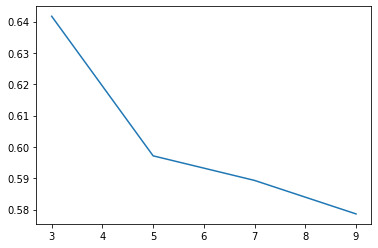

Results of WHR2015
score for k = 3  = 0.6214004019786912
accuracy for k = 3  = 0.6230585424133811
score for k = 5  = 0.6023544754382911
accuracy for k = 5  = 0.6114097968936678
score for k = 7  = 0.5962547855506497
accuracy for k = 7  = 0.6084229390681004
score for k = 9  = 0.5847240585385985
accuracy for k = 9  = 0.5988649940262843


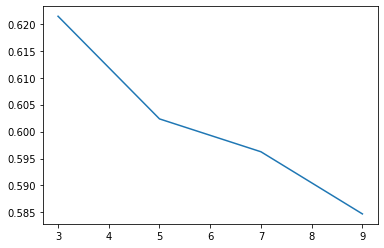

Results of WHR2016
score for k = 3  = 0.6187237877509358
accuracy for k = 3  = 0.6212664277180406
score for k = 5  = 0.6035321577523491
accuracy for k = 5  = 0.6123058542413381
score for k = 7  = 0.5961259193042266
accuracy for k = 7  = 0.6087216248506571
score for k = 9  = 0.5843369760145212
accuracy for k = 9  = 0.5988649940262843


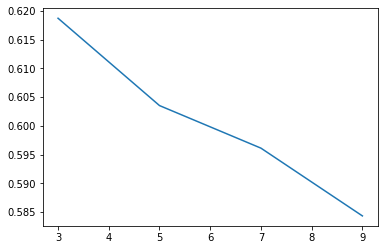

Results of WHR2017
score for k = 3  = 0.6217904761046327
accuracy for k = 3  = 0.6242532855436081
score for k = 5  = 0.6073377797695475
accuracy for k = 5  = 0.6158900836320191
score for k = 7  = 0.5976267899044266
accuracy for k = 7  = 0.6096176821983273
score for k = 9  = 0.5831670160607909
accuracy for k = 9  = 0.5979689366786141


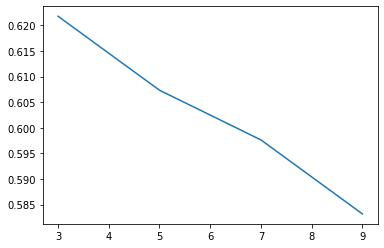

Results of Combined WHR
score for k = 3  = 0.6333037155407123
accuracy for k = 3  = 0.6296296296296297
score for k = 5  = 0.6268387850478027
accuracy for k = 5  = 0.6284348864994026
score for k = 7  = 0.6086432117993691
accuracy for k = 7  = 0.6108124253285544
score for k = 9  = 0.6108156718142767
accuracy for k = 9  = 0.6152927120669056


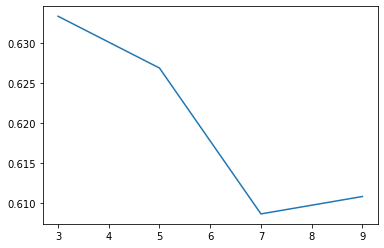

In [0]:
knn_score = knn(training_X, training_y, testing_X, testing_y,'GTD')
final_scores['gtd']['knn'] = knn_score
knn_score = knn(trainingwhr2015_X, trainingwhr2015_y, testingwhr2015_X, testingwhr2015_y,'WHR2015')
final_scores['whr2015']['knn'] = knn_score
knn_score = knn(trainingwhr2016_X, trainingwhr2016_y, testingwhr2016_X, testingwhr2016_y,'WHR2016')
final_scores['whr2016']['knn'] = knn_score
knn_score = knn(trainingwhr2017_X, trainingwhr2017_y, testingwhr2017_X, testingwhr2017_y,'WHR2017')
final_scores['whr2017']['knn'] = knn_score
knn_score = knn(training_combined_X, training_combined_y, testingwhr2017_X, testingwhr2017_y,'Combined WHR')
final_scores['whrall']['knn'] = knn_score

## **Naive Bayes**

In [0]:
def naive_bayes(X_train, y_train, X_test, y_test,name):

    classifier = GaussianNB()
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy of ", name,"= ",accuracy )
    return score

In [0]:
naive_score = naive_bayes(training_X, training_y, testing_X, testing_y,'GTD')
final_scores['gtd']['naive'] = naive_score
naive_score = naive_bayes(trainingwhr2015_X, trainingwhr2015_y, testingwhr2015_X, testingwhr2015_y,'WHR2015')
final_scores['whr2015']['naive'] = naive_score
naive_score3 = naive_bayes(trainingwhr2016_X, trainingwhr2016_y, testingwhr2016_X, testingwhr2016_y,'WHR2016')
final_scores['whr2016']['naive'] = naive_score
naive_score = naive_bayes(trainingwhr2017_X, trainingwhr2017_y, testingwhr2017_X, testingwhr2017_y,'WHR2017')
final_scores['whr2017']['naive'] = naive_score
naive_score = naive_bayes(training_combined_X, training_combined_y, testingwhr2017_X, testingwhr2017_y,'Combined WHR')
final_scores['whrall']['naive'] = naive_score

accuracy of  GTD =  0.6268524007113219
accuracy of  WHR2015 =  0.6427718040621266
accuracy of  WHR2016 =  0.6329151732377539
accuracy of  WHR2017 =  0.6275388291517324
accuracy of  Combined WHR =  0.6311230585424134


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# **Decision Trees**

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Create Decision Tree classifer function
def decisiontree (X_train,y_train,X_test,y_test,name):
  if (name==("GTD")):
    featurelist=['attacktype1','city','country','iyear','target1','targtype1','weaptype1']
  elif (name==("bonus")):
    featurelist=["country","iyear",	"city",	"weaptype1",	"attacktype1",	"targtype1"	,"target1",	"CPI Rank",
                 "Corruption Perceptions Index (CPI)",	"Standard Error",	"Lower Confidence Interval", "Upper Confidence Interval",
                 "World Economic Forum EOS"	,"Global Insight Country Risk Ratings" ,'Bertelsmann Foundation Transformation Index',
                 "PRS International Country Risk Guide" ,
                 "Varities of Democracy Project",	"Economist Intelligence Unit Country Ratings",	"Sources"]
  
  else:
    featurelist=['Dystopia.Residual','Economy..GDP.per.Capita.','Family','Freedom','Generosity','Happiness.Rank','Happiness.Score','Health..Life.Expectancy.','Trust..Government.Corruption.',
                 'attacktype1','city','country','iyear','target1','targtype1','weaptype1']

  clf = DecisionTreeClassifier()
  
  # Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)
  dot_data = StringIO()
  export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = featurelist,class_names=list(str(range(0,20))))
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png(name+'.png') 
  Image(graph.create_png())
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  # Model Accuracy, how often is the classifier correct?
  score = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)
  print("Accuracy of",name,":",accuracy_score(y_test, y_pred))
  return score

In [0]:
decisiontree_score=decisiontree(training_X,training_y,testing_X,testing_y,'GTD')
final_scores['gtd']['decisiontree'] = decisiontree_score
decisiontree_score=decisiontree(trainingwhr2015_X, trainingwhr2015_y, testingwhr2015_X, testingwhr2015_y,'WHR2015')
final_scores['whr2015']['decisiontree'] = decisiontree_score
decisiontree_score=decisiontree(trainingwhr2016_X, trainingwhr2016_y, testingwhr2016_X, testingwhr2016_y,'WHR2016')
final_scores['whr2016']['decisiontree'] = decisiontree_score
decisiontree_score=decisiontree(trainingwhr2017_X, trainingwhr2017_y, testingwhr2017_X, testingwhr2017_y,'WHR2017')
final_scores['whr2017']['decisiontree'] = decisiontree_score
decisiontree_score=decisiontree(training_combined_X, training_combined_y, testingwhr2017_X, testingwhr2017_y,'Combined WHR')
final_scores['whrall']['decisiontree'] = decisiontree_score

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.148077 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.148077 to fit

Accuracy of GTD : 0.7089508002371073
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.140895 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.140895 to fit

Accuracy of WHR2015 : 0.709378733572282
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.139796 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.139796 to fit

Accuracy of WHR2016 : 0.7078853046594982
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.135502 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.135502 to fit

Accuracy of WHR2017 : 0.706989247311828
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.307926 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.307926 to fit

Accuracy of Combined WHR : 0.6075268817204

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
def svm(X_train,y_train,X_test,y_test,name):

  svclassifier = SVC(kernel='linear')
  
  scaler = preprocessing.scale
  X_train =scaler(X_train)
  X_test = scaler(X_test)
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  score = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)
  print("Accuracy of",name,":",accuracy_score(y_test, y_pred))
  return score


In [0]:
svm_score=svm(training_X,training_y,testing_X,testing_y,"GTD")
final_scores['gtd']['svm'] = svm_score
svm_score=svm(trainingwhr2015_X, trainingwhr2015_y, testingwhr2015_X, testingwhr2015_y,"WHR2015")
final_scores['whr2015']['svm'] = svm_score
svm_score=svm(trainingwhr2016_X, trainingwhr2016_y, testingwhr2016_X, testingwhr2016_y,"WHR2016")
final_scores['whr2016']['svm'] = svm_score
svm_score=svm(trainingwhr2017_X, trainingwhr2017_y, testingwhr2017_X, testingwhr2017_y,"WHR2017")
final_scores['whr2017']['svm'] = svm_score
svm_score=svm(training_combined_X, training_combined_y, testingwhr2017_X, testingwhr2017_y,'Combined WHR')
final_scores['whrall']['svm'] = svm_score

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of GTD : 0.5942501481920569


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of WHR2015 : 0.6278375149342891


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of WHR2016 : 0.6281362007168458


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of WHR2017 : 0.6278375149342891
Accuracy of Combined WHR : 0.6063321385902031


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print(final_scores)
finalscoresTable = pd.DataFrame(final_scores)
finalscoresTable.head()

{'gtd': {'knn': 0.6417269034549422, 'naive': 0.610177607735367, 'decisiontree': 0.7122150708942716, 'svm': 0.5583626817229997}, 'whr2015': {'knn': 0.6214004019786912, 'naive': 0.628525621729523, 'decisiontree': 0.7117346798455793, 'svm': 0.5994752278924133}, 'whr2016': {'knn': 0.6187237877509358, 'naive': 0.628525621729523, 'decisiontree': 0.7106009273131676, 'svm': 0.5995866879399019}, 'whr2017': {'knn': 0.6217904761046327, 'naive': 0.6078387272435841, 'decisiontree': 0.7092612726405592, 'svm': 0.5996621768602151}, 'whrall': {'knn': 0.6333037155407123, 'naive': 0.59756628765002, 'decisiontree': 0.5959518638245755, 'svm': 0.5911809378336074}, 'bonus': {}}


,gtd,whr2015,whr2016,whr2017,whrall,bonus
knn,0.641727,0.621400,0.618724,0.621790,0.633304,NaN
naive,0.610178,0.628526,0.628526,0.607839,0.597566,NaN
decisiontree,0.712215,0.711735,0.710601,0.709261,0.595952,NaN
svm,0.558363,0.599475,0.599587,0.599662,0.591181,NaN


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:122: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:124: RuntimeWarning: All-NaN slice encountered
  np.nanmin(y) - 0.5 * sample_range,
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:125: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range,


ValueError: ignored

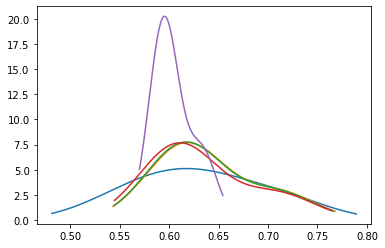

In [0]:
finalscoresTable.plot.density()
plt.show()

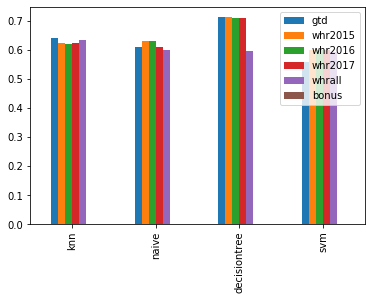

In [0]:
finalscoresTable.plot.bar()
plt.show()

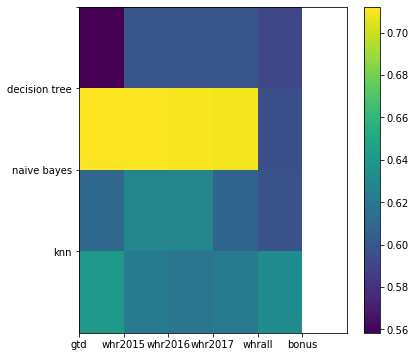

In [0]:
z=finalscoresTable.values

column_labels = ["gtd","whr2015","whr2016", "whr2017","whrall","bonus"]
row_labels = ["knn","naive bayes","decision tree"] 
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xticks(np.arange(z.shape[1]) - 0.5, minor=False)
ax.set_yticks(np.arange(z.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.imshow(z, 
           origin='lower', aspect='auto')
      
plt.colorbar();

# **Bonus**

### **#Adaboost**

In [0]:
def adaboost(X_train,y_train,X_test,y_test,name):
  
  abc=AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
  # Train Adaboost Classifer
  model = abc.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = model.predict(X_test)
  score = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)
  print("Accuracy of",name,":",accuracy_score(y_test, y_pred))
  return score


In [0]:
adaboost_score=adaboost(training_X,training_y,testing_X,testing_y,"GTD")
final_scores['gtd']['adaboost'] = adaboost_score
adaboost_score=adaboost(trainingwhr2015_X, trainingwhr2015_y, testingwhr2015_X, testingwhr2015_y,"WHR2015")
final_scores['whr2015']['adaboost'] = adaboost_score
adaboost_score=adaboost(trainingwhr2016_X, trainingwhr2016_y, testingwhr2016_X, testingwhr2016_y,"WHR2016")
final_scores['whr2016']['adaboost'] = adaboost_score
adaboost_score=adaboost(trainingwhr2017_X, trainingwhr2017_y, testingwhr2017_X, testingwhr2017_y,"WHR2017")
final_scores['whr2017']['adaboost'] = adaboost_score
adaboost_score=adaboost(training_combined_X, training_combined_y, testingwhr2017_X, testingwhr2017_y,"Combined WHR")
final_scores['whrall']['adaboost'] = adaboost_score

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of GTD : 0.531416716064019


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of WHR2015 : 0.4519115890083632


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of WHR2016 : 0.5612305854241338


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of WHR2017 : 0.5313620071684588
Accuracy of Combined WHR : 0.14336917562724014


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# **Random forest**

In [0]:
def randomforest(X_train,y_train,X_test,y_test,name):
  
  #Create a Gaussian Classifier
  clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train,y_train)

  y_pred=clf.predict(X_test)
  
  score = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)
  print("Accuracy of",name,":",accuracy_score(y_test, y_pred))
  return score


In [0]:
randomforest_score=randomforest(training_X,training_y,testing_X,testing_y,"GTD")
final_scores['gtd']['randomforest'] = randomforest_score
randomforest_score=randomforest(trainingwhr2015_X, trainingwhr2015_y, testingwhr2015_X, testingwhr2015_y,"WHR2015")
final_scores['whr2015']['randomforest'] = randomforest_score
randomforest_score=randomforest(trainingwhr2016_X, trainingwhr2016_y, testingwhr2016_X, testingwhr2016_y,"WHR2016")
final_scores['whr2016']['randomforest'] = randomforest_score
randomforest_score=randomforest(trainingwhr2017_X, trainingwhr2017_y, testingwhr2017_X, testingwhr2017_y,"WHR2017")
final_scores['whr2017']['randomforest'] = randomforest_score
randomforest_score=randomforest(training_combined_X, training_combined_y, testingwhr2017_X, testingwhr2017_y,"Combined WHR")
final_scores['whrall']['randomforest'] = randomforest_score

Accuracy of GTD : 0.7377000592768228
Accuracy of WHR2015 : 0.7395459976105138
Accuracy of WHR2016 : 0.7326762246117084
Accuracy of WHR2017 : 0.7311827956989247
Accuracy of Combined WHR : 0.7359617682198327


In [0]:
print(final_scores)
finalscoresTable = pd.DataFrame(final_scores)
finalscoresTable.head()

{'gtd': {'knn': 0.6417269034549422, 'naive': 0.610177607735367, 'decisiontree': 0.7122150708942716, 'svm': 0.5583626817229997, 'adaboost': 0.42677621478292627, 'randomforest': 0.7383099122861617}, 'whr2015': {'knn': 0.6214004019786912, 'naive': 0.628525621729523, 'decisiontree': 0.7117346798455793, 'svm': 0.5994752278924133, 'adaboost': 0.40152624284334276, 'randomforest': 0.7402558696825753}, 'whr2016': {'knn': 0.6187237877509358, 'naive': 0.628525621729523, 'decisiontree': 0.7106009273131676, 'svm': 0.5995866879399019, 'adaboost': 0.4686960953084376, 'randomforest': 0.7331493951639887}, 'whr2017': {'knn': 0.6217904761046327, 'naive': 0.6078387272435841, 'decisiontree': 0.7092612726405592, 'svm': 0.5996621768602151, 'adaboost': 0.35663428048057755, 'randomforest': 0.7320838875246277}, 'whrall': {'knn': 0.6333037155407123, 'naive': 0.59756628765002, 'decisiontree': 0.5959518638245755, 'svm': 0.5911809378336074, 'adaboost': 0.230834611324737, 'randomforest': 0.7361277355856686}, 'bonus'

,gtd,whr2015,whr2016,whr2017,whrall,bonus
knn,0.641727,0.621400,0.618724,0.621790,0.633304,NaN
naive,0.610178,0.628526,0.628526,0.607839,0.597566,NaN
decisiontree,0.712215,0.711735,0.710601,0.709261,0.595952,NaN
svm,0.558363,0.599475,0.599587,0.599662,0.591181,NaN
adaboost,0.426776,0.401526,0.468696,0.356634,0.230835,NaN


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:122: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:124: RuntimeWarning: All-NaN slice encountered
  np.nanmin(y) - 0.5 * sample_range,
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:125: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range,


ValueError: ignored

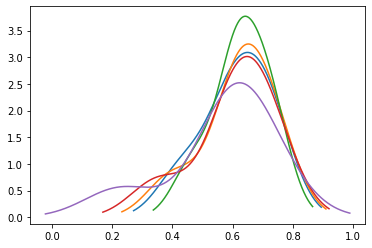

In [0]:
finalscoresTable.plot.density()
plt.show()


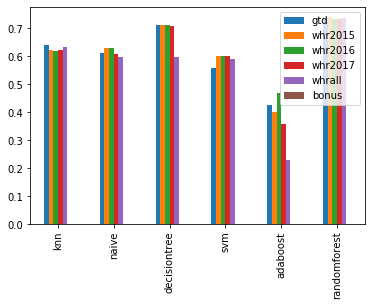

In [0]:
finalscoresTable.plot.bar()
plt.show()

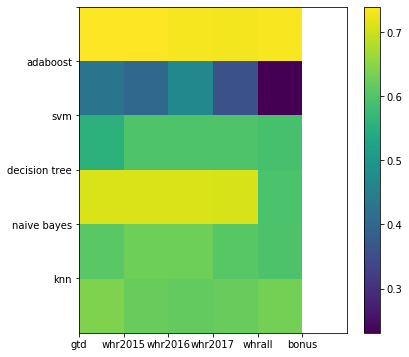

In [0]:
z=finalscoresTable.values

column_labels = ["gtd","whr2015","whr2016", "whr2017","whrall","bonus"]
row_labels = ["knn","naive bayes","decision tree","svm","adaboost"] 
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xticks(np.arange(z.shape[1]) - 0.5, minor=False)
ax.set_yticks(np.arange(z.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.imshow(z, 
           origin='lower', aspect='auto')
      
plt.colorbar();

# **Dataset similar to WHR to compare with it**

In [0]:
!kaggle datasets download -d transparencyint/corruption-index

  0% 0.00/8.76k [00:00<?, ?B/s]
100% 8.76k/8.76k [00:00<00:00, 7.64MB/s]


In [0]:
from zipfile import ZipFile 
file_name = "corruption-index.zip" 
with ZipFile(file_name,'r') as zip: 
  zip.extractall() 
  print('Done')

Done


In [0]:
bonusDataset = pd.read_csv('index.csv',encoding='latin1') 
print(bonusDataset.shape)
bonusDataset.head()

(176, 22)


,CPI Rank,Country,Country Code,Region,Corruption Perceptions Index (CPI),Standard Error,Lower Confidence Interval,Upper Confidence Interval,World Bank CPIA,World Economic Forum EOS,Global Insight Country Risk Ratings,Bertelsmann Foundation Transformation Index,African Development Bank CPIA,IMD World Competitiveness Yearbook,Bertelsmann Foundation Sustainable Governance Index,World Justice Project Rule of Law Index,PRS International Country Risk Guide,Varities of Democracy Project,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,PERC Asia Risk Guide,Sources
0,1,New Zealand,NZL,Asia Pacific,90,2.56,86,94,NaN,90.0,83,NaN,NaN,95.0,99.0,79.0,93.0,NaN,90.0,NaN,NaN,7
1,1,Denmark,DNK,Europe and Central Asia,90,2.46,86,94,NaN,85.0,83,NaN,NaN,98.0,99.0,85.0,93.0,NaN,90.0,NaN,NaN,7
2,3,Finland,FIN,Europe and Central Asia,89,1.46,87,92,NaN,91.0,83,NaN,NaN,94.0,90.0,85.0,93.0,NaN,90.0,NaN,NaN,7
3,4,Sweden,SWE,Europe and Central Asia,88,1.33,85,90,NaN,86.0,83,NaN,NaN,86.0,90.0,85.0,93.0,NaN,90.0,NaN,NaN,7
4,5,Switzerland,CHE,Europe and Central Asia,86,1.57,83,89,NaN,80.0,83,NaN,NaN,88.0,90.0,NaN,85.0,NaN,90.0,NaN,NaN,6


In [0]:
bonusDataset = bonusDataset[bonusDataset.Region == "Middle East and North Africa"]
bonusDataset.head()

,CPI Rank,Country,Country Code,Region,Corruption Perceptions Index (CPI),Standard Error,Lower Confidence Interval,Upper Confidence Interval,World Bank CPIA,World Economic Forum EOS,Global Insight Country Risk Ratings,Bertelsmann Foundation Transformation Index,African Development Bank CPIA,IMD World Competitiveness Yearbook,Bertelsmann Foundation Sustainable Governance Index,World Justice Project Rule of Law Index,PRS International Country Risk Guide,Varities of Democracy Project,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,PERC Asia Risk Guide,Sources
25,24,United Arab Emirates,ARE,Middle East and North Africa,66,5.70,56,75,NaN,86.0,47,53.0,NaN,81.0,NaN,73.0,67.0,NaN,54.0,NaN,NaN,7
27,28,Israel,ISR,Middle East and North Africa,64,2.27,60,68,NaN,69.0,59,NaN,NaN,64.0,61.0,NaN,58.0,NaN,72.0,NaN,NaN,6
32,31,Qatar,QAT,Middle East and North Africa,61,7.02,49,72,NaN,82.0,47,40.0,NaN,80.0,NaN,NaN,67.0,39.0,72.0,NaN,NaN,7
56,57,Jordan,JOR,Middle East and North Africa,48,3.03,43,53,NaN,60.0,34,40.0,NaN,53.0,NaN,50.0,50.0,40.0,54.0,NaN,NaN,8
61,62,Saudi Arabia,SAU,Middle East and North Africa,46,7.54,33,58,NaN,66.0,22,36.0,NaN,NaN,NaN,NaN,50.0,NaN,54.0,NaN,NaN,5


In [0]:
#removing columns with too many null values
bonusDataset = bonusDataset.drop(["World Bank CPIA", "African Development Bank CPIA","Bertelsmann Foundation Sustainable Governance Index","Freedom House Nations in Transit Ratings", "PERC Asia Risk Guide", "IMD World Competitiveness Yearbook", "World Justice Project Rule of Law Index"],axis=1)

In [0]:
training2 = gtdDataset3[gtdDataset3.iyear < 2017]
training2.shape
testyear=[2017]
testing2= gtdDataset3[gtdDataset3.iyear.isin(testyear)]
testing2.shape

(3374, 12)

In [0]:
trainingBonus = pd.merge(training2, bonusDataset, left_on='country_txt', right_on='Country')
testingBonus = pd.merge(testing2, bonusDataset, left_on='country_txt', right_on='Country')

In [0]:
#removing unnecessary and non numerical data
trainingBonus = trainingBonus.drop(['country_txt', 'region_txt', 'Country', 'eventid','region','Country Code','Region'], axis=1)
testingBonus = testingBonus.drop(['country_txt', 'region_txt', 'Country', 'eventid','region','Country Code','Region'], axis=1)

In [0]:
trainingBonus.head()

,gname,country,iyear,city,weaptype1,attacktype1,targtype1,target1,CPI Rank,Corruption Perceptions Index (CPI),Standard Error,Lower Confidence Interval,Upper Confidence Interval,World Economic Forum EOS,Global Insight Country Risk Ratings,Bertelsmann Foundation Transformation Index,PRS International Country Risk Guide,Varities of Democracy Project,Economist Intelligence Unit Country Ratings,Sources
0,388,6,2000,1734,9,2,14,729,108,34,2.94,29,39,33.0,22,36.0,32.0,44.0,37.0,6
1,388,6,2000,2697,6,3,15,5338,108,34,2.94,29,39,33.0,22,36.0,32.0,44.0,37.0,6
2,388,6,2000,1871,5,2,1,528,108,34,2.94,29,39,33.0,22,36.0,32.0,44.0,37.0,6
3,388,6,2000,4257,6,3,3,1068,108,34,2.94,29,39,33.0,22,36.0,32.0,44.0,37.0,6
4,388,6,2000,3371,5,2,3,2302,108,34,2.94,29,39,33.0,22,36.0,32.0,44.0,37.0,6


In [0]:
#removing any null tuples
trainingBonus.dropna(axis=0,inplace=True)
testingBonus.dropna(axis=0,inplace=True)

In [0]:
#splitting training into labels and data
trainingBonus_y = trainingBonus.gname.values
trainingBonus_X = trainingBonus.drop(['gname'],axis=1).values
print(trainingBonus_X.shape)
#splitting testing into labels and data
testingBonus_y = testingBonus.gname.values
testingBonus_X = testingBonus.drop(['gname'],axis=1).values
print(testingBonus_X.shape)

(3680, 19)
(258, 19)


Results of bonus
score for k = 3  = 0.5592076757116964
accuracy for k = 3  = 0.5310077519379846
score for k = 5  = 0.5406612309311666
accuracy for k = 5  = 0.5193798449612403
score for k = 7  = 0.5248562836870229
accuracy for k = 7  = 0.5
score for k = 9  = 0.5135228138280538
accuracy for k = 9  = 0.4806201550387597


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


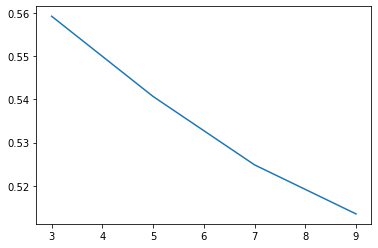

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy of  bonus =  0.627906976744186
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.534387 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.534387 to fit

Accuracy of bonus : 0.6201550387596899


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.533135 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.533135 to fit

Accuracy of bonus : 0.624031007751938


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of bonus : 0.7479091995221028
Accuracy of bonus : 0.735663082437276


In [0]:
bonusScores = {}
knn_score=knn(trainingBonus_X, trainingBonus_y, testingBonus_X, testingBonus_y,'bonus')
final_scores['bonus']['knn'] = knn_score
naive_score=naive_bayes(trainingBonus_X, trainingBonus_y, testingBonus_X, testingBonus_y,'bonus')
final_scores['bonus']['naive'] = naive_score
decisiontree_score=decisiontree(trainingBonus_X, trainingBonus_y, testingBonus_X, testingBonus_y,'bonus')
final_scores['bonus']['decisiontree'] = decisiontree_score
svm_score=decisiontree(trainingBonus_X, trainingBonus_y, testingBonus_X, testingBonus_y,'bonus')
final_scores['bonus']['svm'] = svm_score
adaboost_score=randomforest(training_combined_X, training_combined_y, testingwhr2017_X, testingwhr2017_y,"bonus")
final_scores['bonus']['adaboost'] = adaboost_score
randomforest_score=randomforest(training_combined_X, training_combined_y, testingwhr2017_X, testingwhr2017_y,"bonus")
final_scores['bonus']['randomforest'] = randomforest_score


In [0]:
print(final_scores)
finalscoresTable = pd.DataFrame(final_scores)
finalscoresTable.head(n=6)

{'gtd': {'knn': 0.6417269034549422, 'naive': 0.610177607735367, 'decisiontree': 0.7122150708942716, 'svm': 0.5583626817229997, 'adaboost': 0.42677621478292627, 'randomforest': 0.7383099122861617}, 'whr2015': {'knn': 0.6214004019786912, 'naive': 0.628525621729523, 'decisiontree': 0.7117346798455793, 'svm': 0.5994752278924133, 'adaboost': 0.40152624284334276, 'randomforest': 0.7402558696825753}, 'whr2016': {'knn': 0.6187237877509358, 'naive': 0.628525621729523, 'decisiontree': 0.7106009273131676, 'svm': 0.5995866879399019, 'adaboost': 0.4686960953084376, 'randomforest': 0.7331493951639887}, 'whr2017': {'knn': 0.6217904761046327, 'naive': 0.6078387272435841, 'decisiontree': 0.7092612726405592, 'svm': 0.5996621768602151, 'adaboost': 0.35663428048057755, 'randomforest': 0.7320838875246277}, 'whrall': {'knn': 0.6333037155407123, 'naive': 0.59756628765002, 'decisiontree': 0.5959518638245755, 'svm': 0.5911809378336074, 'adaboost': 0.230834611324737, 'randomforest': 0.7361277355856686}, 'bonus'

,gtd,whr2015,whr2016,whr2017,whrall,bonus
knn,0.641727,0.621400,0.618724,0.621790,0.633304,0.559208
naive,0.610178,0.628526,0.628526,0.607839,0.597566,0.596466
decisiontree,0.712215,0.711735,0.710601,0.709261,0.595952,0.638521
svm,0.558363,0.599475,0.599587,0.599662,0.591181,0.643374
adaboost,0.426776,0.401526,0.468696,0.356634,0.230835,0.748147
randomforest,0.738310,0.740256,0.733149,0.732084,0.736128,0.735323


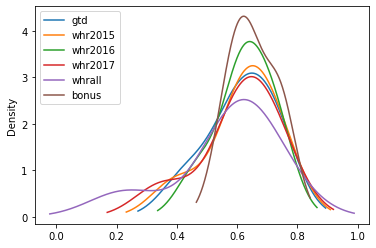

In [0]:
finalscoresTable.plot.density()
plt.show()


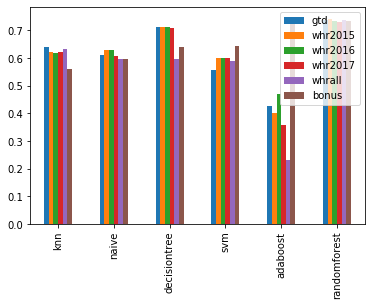

In [0]:
finalscoresTable.plot.bar()
plt.show()

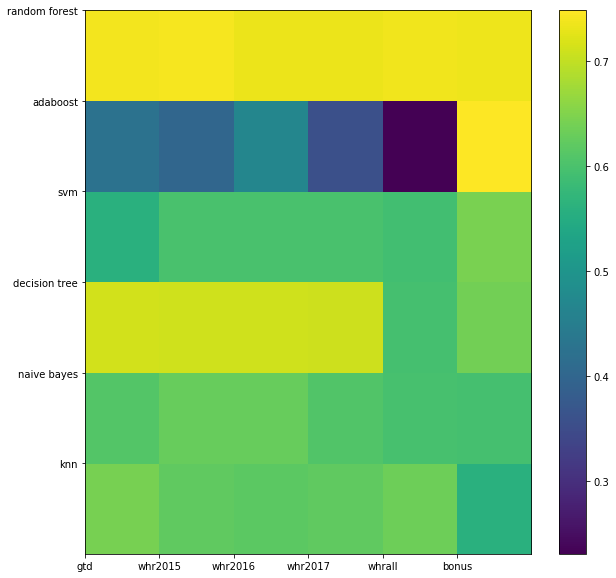

In [0]:
z=finalscoresTable.values

column_labels = ["gtd","whr2015","whr2016", "whr2017","whrall","bonus"]
row_labels = ["knn","naive bayes", "decision tree", "svm","adaboost","random forest"] 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks(np.arange(z.shape[1]) - 0.5, minor=False)
ax.set_yticks(np.arange(z.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.imshow(z,origin='lower', aspect='auto')      
plt.colorbar();

# **PDF**

In [0]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1 libtexlua52
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-did-you-mean ruby-minitest ruby-net-telnet ruby-power-assert
  ruby-test-unit ruby2.5 rubygems-integration t1utils tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp /content/drive/'My Drive'/'Colab Notebooks'/'assignment#3.ipynb' ./

In [145]:
!jupyter nbconvert  "/content/drive/My Drive/Colab Notebooks/assignment#3.ipynb" --to pdf


[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/assignment#3.ipynb to pdf
[NbConvertApp] Support files will be in assignment#3_files/
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Making directory ./assignment#3_files
[NbConvertApp] Writing 257991 bytes to ./not